Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

# Casos de Covid-19 no Ceará 

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

Baixando arquivo direto da internet no [integraSUS](https://integrasus.saude.ce.gov.br/)

In [2]:
import requests

url = 'http://download-integrasus.saude.ce.gov.br/casos_covid19'

r = requests.get(url)
with open('download/casos_covid19.zip', 'wb') as code:
    code.write(r.content)

Descompactando o arquivo.

In [3]:
from zipfile import ZipFile

z = ZipFile('download/casos_covid19.zip', 'r')
z.extractall('dataset')
#z.extract('./dataset')
z.close()

Listando os arquivos extraidos

In [4]:
import os 

lista_arquivos = os.listdir('dataset')
lista_arquivos

['casos_coronavirus_2020_12_02.csv',
 'casos_coronavirus_localidade_2020_12_02.csv']

Importando a base de dados

In [5]:
import pandas as pd

df_casos = pd.read_csv('dataset/casos_coronavirus_2020_12_02.csv', encoding='utf-8',
                       sep=';', thousands='.', decimal=',',engine='python',error_bad_lines=False)

Verificando as primeiras linhas do aqrquivo

In [6]:
df_casos.head()

,identificadorCaso,idRedcap,idEsus,idSivep,classificacaoEstadoRedcap,classificacaoEstadoEsus,classificacaoFinalEsus,evolucaoCasoEsus,cboEsus,profissionalSaudeEsus,...,municipioNotificacaoEsus,tipoObitoMaterno,classificacaoFinalCasoSivep,gestante,tipoTesteEsus,obitoConfirmado,dataObito,classificacaoObito,localObito,tipoLocalObito
0,bbf44037c5d6fbf6bf699342c3cfeedc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6ce7ae3eb4bf25a5a3f0f89f645cff5c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e55f0570a91fde947f945623c390fce5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,333484dc91f8ce312185a21ba03d6d60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b42c630392bbac85b8eae692a4492134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_casos.columns

Index(['identificadorCaso', 'idRedcap', 'idEsus', 'idSivep',
       'classificacaoEstadoRedcap', 'classificacaoEstadoEsus',
       'classificacaoFinalEsus', 'evolucaoCasoEsus', 'cboEsus',
       'profissionalSaudeEsus', 'paisCaso', 'estadoCaso',
       'codigoMunicipioCaso', 'municipioCaso', 'bairroCaso',
       'bairroCasoGeocoder', 'sexoCaso', 'idadeCaso', 'faixaEtaria',
       'dataNascimento', 'dataNotificacao', 'dataInicioSintomas',
       'dataSolicitacaoExame', 'dataColetaExame', 'dataResultadoExame',
       'resultadoFinalExame', 'laboratorioExame', 'classificacaoEstadoSivep',
       'dataInternacaoSivep', 'dataEntradaUTISivep', 'dataSaidaUTISivep',
       'evolucaoCasoSivep', 'dataEvolucaoCasoSivep',
       'comorbidadePuerperaSivep', 'comorbidadeCardiovascularSivep',
       'comorbidadeHematologiaSivep', 'comorbidadeSindromeDownSivep',
       'comorbidadeHepaticaSivep', 'comorbidadeAsmaSivep',
       'comorbidadeDiabetesSivep', 'comorbidadeNeurologiaSivep',
       'comorbidad

A baixo verificamos que muitos registros não tem data de inicio dos sintomas. 

Podemos imputar esses dados pegando a data dacoleta ou calculando apartir do resultado de acordo com o tipo de exame do exame.

data do resultado positivo - (8 dias para TR) ou (4 dias para RTPCR)

In [15]:
df_casos['dataInicioSintomas'].value_counts()

NaT           448457
2020-06-01      9522
2020-07-01      8978
2020-06-10      8834
2020-06-15      8181
               ...  
2020-01-16         3
2020-01-11         3
2020-01-29         3
2020-01-31         2
2020-01-17         1
Name: dataInicioSintomas, Length: 337, dtype: int64

Esse é um dataset muito rico, podemos fazer diversas analises.

Vamos primeiro plotar a curva epidemiológica que é o número de casos com resultadoFinalExame **Positivo** por dataInicioSintomas.

In [9]:
df_casos_positovos = df_casos[(df_casos["resultadoFinalExame"] == 'Positivo')]

Verificamos a baixo que apesar dos dados serem do estado do Ceará temos casos que residem em outros estados.

In [10]:
df_casos_positovos['estadoCaso'].unique()

array(['CE', 'RIO GRANDE DO SUL', nan, 'RIO DE JANEIRO', 'SP',
       'SANTA CATARINA', 'PI', 'BAHIA', 'PARANÁ', 'SÃO PAULO',
       'RIO GRANDE DO NORTE', 'PARA', 'PIAUI', 'PARAÍBA', 'PARAIBA',
       'MINAS GERAIS', 'AMAZONAS', 'PIAUÍ', 'RJ', 'PARANA', 'PERNAMBUCO',
       'RORAIMA', 'AMAPÁ', 'MATO GROSSO', 'SERGIPE', 'ALAGOAS',
       'SAO PAULO', 'PARÁ', 'DISTRITO FEDERAL', 'MARANHÃO', 'AMAPA',
       'TOCANTINS', 'GOIÁS', 'RONDONIA', 'RONDÔNIA', 'MATO GROSSO DO SUL',
       'MA', 'MARANHAO', 'ESPÍRITO SANTO', 'ACRE', 'GOIAS', 'MG', 'RN',
       'ESPIRITO SANTO', 'PE', 'PB', 'AL', 'PA'], dtype=object)

Nós vamos considerar apenas os residentes no ceará. **Porque...** 

In [11]:
df_casos_positovos['estadoCaso'].value_counts().head()

CE                     374904
SP                        316
BAHIA                     245
RIO GRANDE DO NORTE       241
PERNAMBUCO                186
Name: estadoCaso, dtype: int64

In [12]:
df_casos_positovos = df_casos_positovos[(df_casos_positovos["estadoCaso"] == 'CE')]

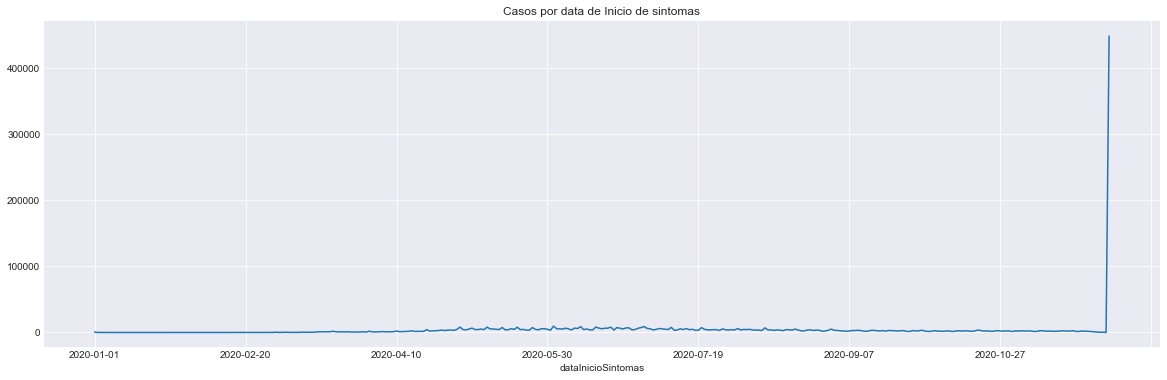

In [13]:
ts = df_casos.groupby(['dataInicioSintomas']).dataInicioSintomas.count()
ts.plot(figsize=(20,6), title='Casos por data de Inicio de sintomas')

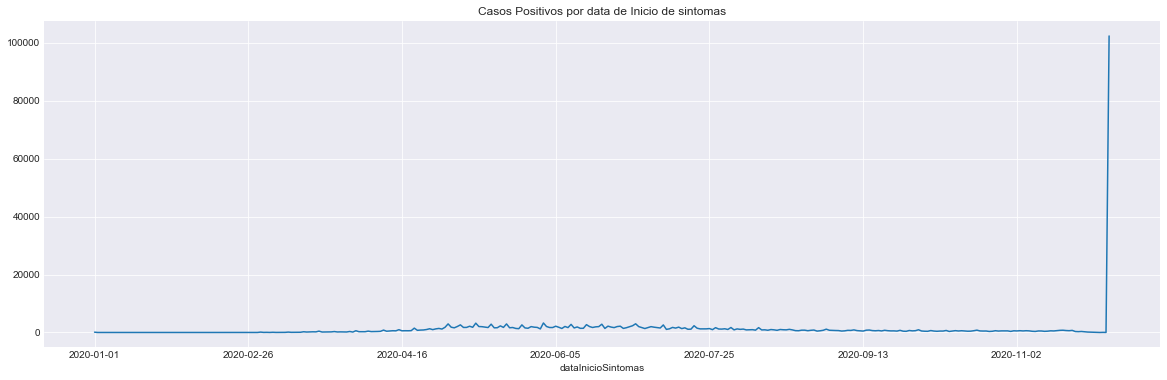

In [14]:
group = df_casos_positovos.groupby(['dataInicioSintomas'])['dataInicioSintomas'].count()
group.plot(figsize=(20,6), title='Casos Positivos por data de Inicio de sintomas')